In [1]:
import numpy as np
import cv2


import random
import matplotlib.pyplot as plt

%matplotlib inline

import os

from PIL import Image

import pandas as pd


In [2]:
# preprocesar

import cv2
bs_path = './data/bs_external/'
bs_path_o = './data/bs_external/original_bs/'

def bs_to_rgb(name):
       
    bs= name  + '.png'

    # grayscale image
    gray_image = cv2.imread(bs_path_o + bs, cv2.IMREAD_GRAYSCALE)
    #print(gray_image.shape)
    
    scale_percent= 1/2
    width = int(gray_image.shape[1] * scale_percent )
    height = int(gray_image.shape[0] * scale_percent )

    # resize image
    gray_image = cv2.resize(gray_image, (width, height))    

    # Convert to 3-channel image
    rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)   
    
    
    #print(rgb_image.shape)
    plt.imshow(rgb_image)
    plt.show


    #save
    img = Image.fromarray(rgb_image, 'RGB')
    img.save(bs_path + name + '_rgb' + '.png')
    
#bs_to_rgb('brush_fromweb2_large_vertical')    
#bs_to_rgb('brush_fromweb2_large_horizontal')    
#bs_to_rgb('brush_fromweb2_small_vertical')    
#bs_to_rgb('brush_fromweb2_small_horizontal')    


In [3]:
bs_path = './data/bs_external/'
paint_path = './data/bs_external_paints/'


In [4]:
def load_lst_of_bs(dir_path):

    # list to store files
    lst_bs = []
   
    for bs in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, bs)):
            lst_bs.append(bs)
    
    return lst_bs

In [5]:
#lst_bs=load_lst_of_bs(bs_path)


In [6]:
#https://github.com/matteo-ronchetti/Pointillism/commit/cb6d4454b636488fc2a1993b93f338a2341ba459
# función para repartir las coordenadas de los bs en toda la dimensión del frame

def randomized_grid(h, w, scale):
    
    if ( scale==0):
        scale=min(h,w)//3
    assert (scale > 0)

    r = scale//2   
    
    grid = []
    for i in range(0, h, scale):
        for j in range(0, w, scale) :
            y = random.randint(-r, r) + i
            x = random.randint(-r, r) + j          
            
             
            grid.append((y % h, x % w))           
                     
                
    random.shuffle(grid)
    return grid
    

def plot_grid(grid,h,w):
    
    x_val = [x[0] for x in grid]
    y_val = [x[1] for x in grid]
    
    plt.axis([0, h,0, w])    
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.scatter(x_val,y_val)
    plt.show()

In [7]:
"""grid1=randomized_grid(600,400,50)
plot_grid(grid1,600,400)

frame_size=(600,400)
scale_points=100
bs_centers = randomized_grid(h=frame_size[0], w=frame_size[1],scale=scale_points) # valorar introducir la scale en un random limitado
bs_select = np.random.choice(lst_bs, size=len(bs_centers), replace=True)
#bs_select=random.sample.choice(lst_bs, len(bs_centers), replace=True)"""

'grid1=randomized_grid(600,400,50)\nplot_grid(grid1,600,400)\n\nframe_size=(600,400)\nscale_points=100\nbs_centers = randomized_grid(h=frame_size[0], w=frame_size[1],scale=scale_points) # valorar introducir la scale en un random limitado\nbs_select = np.random.choice(lst_bs, size=len(bs_centers), replace=True)\n#bs_select=random.sample.choice(lst_bs, len(bs_centers), replace=True)'

In [8]:
#https://gist.github.com/adewes/5884820

def get_random_color(pastel_factor = 0.5):
    return [(x+pastel_factor)/(1.0+pastel_factor) for x in [random.uniform(0,1.0) for i in [1,2,3]]]

def color_distance(c1,c2):
    return sum([abs(x[0]-x[1]) for x in zip(c1,c2)])

def generate_new_color(existing_colors,pastel_factor = 0.5):
    max_distance = None
    best_color = None
    for i in range(0,100):
        color = get_random_color(pastel_factor = pastel_factor)
        if not existing_colors:
            return color
        best_distance = min([color_distance(color,c) for c in existing_colors])
        if not max_distance or best_distance > max_distance:
            max_distance = best_distance
            best_color = color
    return best_color

def generate_palette(n_colors,pastel_factor=0.5):
    palette_color = []

    for i in range(0,n_colors):
        palette_color.append(generate_new_color(palette_color,pastel_factor = pastel_factor))
       # print(palette_color)
    return palette_color  

   

In [9]:
scale_points=100 # higher, less bs's

#h,w vienen de la pintura original, con esto se construye elframe


def paint_generator (paint_idx,scale):   
    
#random parameters

    lst_frame_sizes=[(600,600),(400,600),(600,400),(800,400),(400,800),(600,200), (200,600),(200,200),(400,400)]
    #lst_frame_sizes=[(128,128),(64,64),(192,192),(28,28)]
    #lst_frame_sizes=[(128,128)]

    #______________frame selection from the list
    frame_size=random.choice(lst_frame_sizes)

    #print("Randomly selected frame size:",frame_size)

    bs_centers = randomized_grid(h=frame_size[0], w=frame_size[1],scale=scale) # valorar introducir la scale en un random limitado

    plot_grid (grid=bs_centers,h=frame_size[0],w=frame_size[1])

    #print('Num de brush strokes {}. Donde las coordenadas de los centroides{}:'.format(len(bs_centers),bs_centers))
    lst_bs=load_lst_of_bs(bs_path)
   

    #______________elegir aleatoriamente n=len(bs_centers) centroides donde se van a situar los bs, selección de bs
    #bs_select=random.sample(lst_bs, len(bs_centers))
    bs_select = np.random.choice(lst_bs, size=len(bs_centers), replace=True)
    #print("brush strokes seleccionados de la db de bs:", bs_select)

    #______________ seleccionar un angulo para girar la figura [0,360]
    lst_degrees=[x for x in range(360)]
    degree=random.sample(lst_degrees, len(bs_centers))
    #print("grados de giro para los bs:", degree)

    #______________añadir un cambio en el tamaño del bs en base a un %. Rango elegido :de -30 a 30
    lst_pct=[(x) for x in range(-10,10)]    
    lst_scale_percent=np.random.choice(lst_pct, len(bs_centers))
    
    #lst_scale_percent=random.choice(np.arange(0.0, 0.5, 0.1))
    #print("escala de tamaño a aplicar en %:", lst_scale_percent)

    #______________colors
    palette = generate_palette(len(bs_centers),pastel_factor=0.5)
    palette_array = np.array(palette)[np.newaxis, :, :]
    #plt.imshow(palette_array)
    
    #plt.axis('off')    
    #plt.show()
    lst_colors=palette_array.tolist()
    #print('Array con los rgb de la paleta seleccionada {}.'.format(lst_colors))
    
    
#painting

    #generating the frame from frame_size
    blank_image = np.zeros((frame_size[0],frame_size[1],3), np.uint8)
    #adding bs's en bs_centers, en el color de la paleta
    #[0]
    lst_imag=[]
    for k in range (len(bs_centers)):

        bs=bs_select[k]
        bs_xy=bs_centers[k]
        bs_color=lst_colors[0][k]
        bs_scale=lst_scale_percent[k]
        bs_angle=degree[k]

        #print ("\n figura bs:",bs,"\n coord:",bs_xy,"\n color:",bs_color,'\n scale:',bs_scale,"\n angle:",bs_angle )
        #blank_image[bs_xy[0],bs_xy[1]]=bs_color

        #rotation
        bs_k_im=Image.open(bs_path + bs)
        rotated=bs_k_im.rotate(bs_angle, expand=True)
        bs_k = np.asarray(rotated)

        #resize
        
        width = int(bs_k.shape[1] * (1 + bs_scale / 100))
        height = int(bs_k.shape[0] * (1 +  bs_scale / 100))
        #print(bs_k.shape[0],bs_k.shape[1])
        bs_k = cv2.resize(bs_k, (width, height))


        #centramos el bs en el punto donde tenemos que colocarlo
        bs_center=(int(bs_k.shape[0] /2) , int(bs_k.shape[1] /2))
        adjust=(bs_xy[0]-bs_center[0],bs_xy[1]-bs_center[1])

        rgb_tresh=0
        (x,y) = np.where((bs_k[:,:, 0] > rgb_tresh) & (bs_k[ :,:, 1] > rgb_tresh) & (bs_k[:, :, 2] >  rgb_tresh))
        (x,y) = (x + adjust[0], y + adjust[1] )
        
            
        #generamos un array de imagenes donde layer=index_array =orden_de_pintura =k 
        imag_k = np.ones((frame_size[0],frame_size[1],3),np.float64)  

        x2= x[(y< frame_size[1]) & (x <frame_size[0]) & (x>0) & (y>0)]
        y2= y[(y< frame_size[1]) & (x <frame_size[0]) & (x>0) & (y>0) ]
        x=x2
        y=y2
        imag_k[x,y] = lst_colors[0][k]

        lst_imag.append(imag_k)
        #print(imag_k.shape, lst_colors[0][k])
        #print the image kept in list, first we need to transpose
        #imag_k_t= imag_k.transpose(1, 0, 2)
        #print(imag_k_t.shape)
        #plt.axis([0, frame_size[0],0, frame_size[1]])
        #plt.imshow(imag_k_t)     
        

        #implot = plt.imshow(blank_image)

        #plt.axis('equal')
        #plt.xlim(0, frame_size[0]) 
        #plt.ylim(0, frame_size[1])
        #plt.scatter(x,y,color=lst_colors[0][k])
        alpha=random.choice(np.arange(0.0, 1.0, 0.1))
        plt.scatter(x,y,color=[lst_colors[0][k]],s=1, alpha=alpha)
        #print the image kept in list   
 
        #plt.show()
        #bs_k_im
        
     
    plt.axis([0, frame_size[0],0, frame_size[1]])
    #print('frame_size_saved:',frame_size[0],frame_size[1])
    plt.gca().set_aspect('equal', adjustable='box')
    #plt.gca().get_yaxis().set_visible(False)
    #plt.gca().get_xaxis().set_visible(False)
    
    #plt.gca().set_axis_off()
    #plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
     
        
    #para guardar, eliminamos los ejes
    
    #plt.axis('off')
    paint_id="paint_" + ("0"*4 + str(paint_idx))[-5:] 
#plt.savefig(paint_path + paint_id + ".png")
    #bbox_inches='tight'
    #pad_inches=0.0
    
    #para mostrar, dejamos los axis
    #plt.axis('off')  
    
    plt.show()   
    
    #array_imag=paint_df(lst_imag,paint_id)
    
  
    #Image.fromarray((array_imag * 255).astype('uint8'),'RGB').save(paint_path + paint_id + ".png")  
    
    
    #plt.xlim(0, frame_size[0]) 
    #plt.ylim(0, frame_size[1])
    return lst_imag, paint_id    
    
    

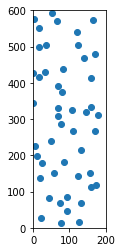

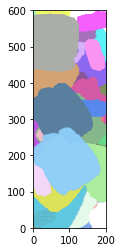

In [10]:
a,b = paint_generator(999,scale=50)


#como input, necesitmamos la imagen orig
#a partir de esta se selecciona la paleta
# hacerlo todo por segmento de image segmentation

# el tamaño de los brochazos tiene que ir siendo menor según se dan capas

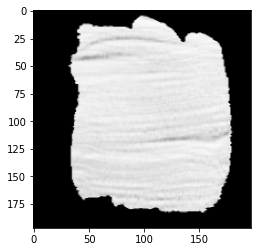

In [17]:

bs_path = './data/bs_external/'
bs_path_o = './data/bs_external/original_bs/'

name='brush_fromweb2_large_horizontal'
bs= name  + '.png'

# grayscale image
gray_image = cv2.imread(bs_path_o + bs, cv2.IMREAD_GRAYSCALE)
#print(gray_image.shape)

scale_percent= 1/2
width = int(gray_image.shape[1] * scale_percent )
height = int(gray_image.shape[0] * scale_percent )

# resize image
gray_image = cv2.resize(gray_image, (width, height))    

# Convert to 3-channel image
rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)   


#print(rgb_image.shape)
plt.imshow(rgb_image)



#bs_to_rgb('brush_fromweb2_large_vertical')    
#bs_to_rgb('brush_fromweb2_large_horizontal')    
#bs_to_rgb('brush_fromweb2_small_vertical')    
#bs_to_rgb('brush_fromweb2_small_horizontal')    


In [28]:

from PIL import Image

img = Image.open(bs_path_o + bs)
img = img.convert("RGB")
 
d = img.getdata()
 
new_image = []
for item in d:
   
    # change all white (also shades of whites)
    # pixels to yellow
    if item[0] in list(range(230, 256)):
        new_image.append((255, 224, 100))
    else:
        #new_image.append((255, 234, 100))
        new_image.append(item)
         
# update image data
img.putdata(new_image)
 
# save new image
#img.save("flower_image_altered.jpg")

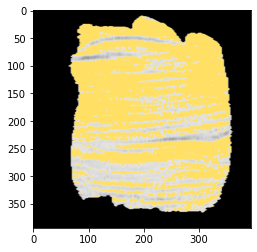

In [30]:
plt.imshow(img)

## para una v2m, añadir curvatura a los brochazos



import cv2
import numpy as np

#Load the image
img = cv2.imread(bs_path_o + bs)


#Define the rectangle coordinates
x, y, w, h = 100, 350, 250, 34

#Define the radius of curvature
radius = 50

#Define the center of the rectangle
rect_center = (x + w//2, y + h//2)

#Define the rectangles corner points
rect = np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h]], dtype=np.float32)

#Define the curve corner points
curve = np.zeros((4, 2), dtype=np.float32)
for i in range(4):
    vec = rect[i] - rect_center
    length = np.linalg.norm(vec)
    scale = radius / length
    curve[i] = rect_center + vec * scale

#Draw the curved rectangle on the image
img = cv2.fillConvexPoly(img, curve.astype(int), (0, 255, 0))

#Show the image
cv2.imshow("Curved Rectangle", img)
cv2.waitKey(0)
cv2.destroyAllWindows()